In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
tweets_csv = pd.read_csv("startups/tweets.csv")

In [5]:
tweets_csv.shape

(387847, 8)

In [13]:
tweets_csv[196:200]

,Company,Href,Likes,Name,Retweets,Series,Text,Time
196,Occipital,/naomicostantino,0 likes,Naomi Costantino,0 retweets,_Series_A,releasing the occipital muscles @stefanwarth @...,28 Jun 2011
197,Occipital,/scottbalster,0 likes,Scott Balster,0 retweets,_Series_A,@vikasreddy You're welcome! Completely amazed ...,27 Jun 2011
198,MyEdu,/koalialoalo,0 likes,Victoria,0 retweets,_Series_A,wth? why is myedu so expensive? wasn't pickapr...,13 Dec 2009
199,MyEdu,/myedu_hiroba,0 likes,マイエデュグローバルひろば情報,0 retweets,_Series_A,本日のグローバルキャリア塾終了！Pacific Gatewayのサミー校長はいつものように熱...,11 Dec 2009


In [17]:
from collections import Counter
Counter(tweets_csv.Series)

Counter({'_Series_B': 173305, '_Series_A': 91071, '_Series_C': 90223, '_Series_D': 33135, nan: 113})

In [24]:
int(tweets_csv['Likes'][0].split()[0])

0

In [32]:
tweets_csv[:4].apply(lambda x: len(x), axis=1)

0    8
1    8
2    8
3    8
dtype: int64

In [37]:
tweets_csv[:10].apply(lambda row: int(row[2].split()[0]), axis=1)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

Average tweet length
average tweet per day
proportion of tweets from companies
number of likes/retweets


In [19]:
tweets_csv.ix[196]

Company                                             Occipital
Href                                         /naomicostantino
Likes                                                 0 likes
Name                                         Naomi Costantino
Retweets                                           0 retweets
Series                                              _Series_A
Text        releasing the occipital muscles @stefanwarth @...
Time                                              28 Jun 2011
Name: 196, dtype: object

In [ ]:
def get_num_first(text):
    try:
        

In [41]:
'0 Likes'

NameError: name 'likes' is not defined

In [47]:
int(tweets_csv['Likes'][0].split()[0])

0

In [80]:
def get_num_first(text):
    try:
        return int(text.split()[0])
    except:
        return 0


In [66]:
isinstance('0 Likes', basestring)

True

In [75]:
likes_nan_index = []
for i in xrange(len(tweets_csv['Likes'])):
    if not isinstance(tweets_csv['Likes'][i], basestring):
        #print i
        #print tweets_csv['Likes'][i]
        likes_nan_index.append(i)
        

In [76]:
retweets_nan_index = []
for i in xrange(len(tweets_csv['Likes'])):
    if not isinstance(tweets_csv['Likes'][i], basestring):
        #print i
        #print tweets_csv['Likes'][i]
        retweets_nan_index.append(i)

In [77]:
len(retweets_nan_index)

111

In [101]:
len(retweets)

387847

In [82]:
likes = tweets_csv.apply(lambda row: get_num_first(row[2]), axis=1)
retweets = tweets_csv.apply(lambda row: get_num_first(row[4]), axis=1)

In [93]:
dates = tweets_csv.apply(lambda row: get_date(row[7]), axis=1)

In [90]:
from datetime import datetime
def get_date(text):
    try:
        return datetime.date(datetime.strptime(text, '%d %b %Y'))
    except:
        return 0

In [150]:
tweets_df = pd.DataFrame({    
                  'company_name': tweets_csv['Company'], 
                  'tweeter_href': tweets_csv['Href'],
                  'likes'       : likes,
                  'tweeter_name': tweets_csv['Name'],
                  'retweets'    : retweets,
                  'Series'      : tweets_csv['Series'],
                  'text'        : tweets_csv['Text'],
                  'date'        : dates
             })

In [106]:
tweets_df.groupby()

,Series,company_name,date,likes,retweets,text,tweeter_href,tweeter_name
0,_Series_A,Occipital,2011-07-14,0,0,@rubaums2 mira no frontal até o occipital e f...,/yehyehgluglu,Maria Melo
1,_Series_A,Occipital,2011-07-14,0,1,"Cats out of the bag, we're excited! RT @savvys...",/occipital,Occipital
2,_Series_A,Occipital,2011-07-14,0,0,me duele la cabeza a la altura del occipital -...,/ArturoMisifu,Arturo Quijano
3,_Series_A,Occipital,2011-07-14,0,0,"No matter what happens, I always have the Occi...",/ortidog,Paul White
4,_Series_A,Occipital,2011-07-14,0,0,Headaches are mostly caused by adhesions in th...,/durlancastro,Durlan Castro


In [332]:
tweets_df.company_name.unique()[:60]

array(['Occipital', 'MyEdu', 'Kenandy', 'Vapotherm', 'Karmasphere',
       'NextDocs', 'Ciespace', 'GetSatisfaction', 'clypd', 'Vungle',
       'BookShout', 'Placeiq', 'ShareThis', 'GenesisMedia', 'Huddle',
       'Aereo', 'Gainspeed', 'healthrageous', 'Reachable', 'TopTenREVIEWS',
       'Travelata', 'Sakti3', 'NatureBox', 'Invoca', 'PlainVanillaGames',
       'NextNewNetworks', 'Mig33', 'Lastline', 'Doxo', 'Nebula',
       'KnoaSoftware', 'Xagenic', 'Fitbit', 'lmbang', 'CSAMedical',
       'ThirdMotion', 'Visier', 'NewsCred', 'TinyCo', 'Polyvore', 'Kinvey',
       'Fancy', 'Verdeeco', 'CarnegieSpeech', 'Between', 'NationBuilder',
       'Sonian', 'FullContact', 'Redux', 'Indiegogo', 'Hopper',
       'EquityLock', 'OutSmartPowerSystems', 'uCirrus',
       'PowerhouseDynamics', 'PsiKick', 'OurStage', 'Boxee', 'TravelBird',
       'TwistBioscience'], dtype=object)

In [301]:
'@nextdocs'[1:]

'nextdocs'

In [300]:
tweets_df.head()

,Series,company_name,date,likes,retweets,text,tweeter_href,tweeter_name,persontag_count,hashtag_count,text_length,persontags,hashtags,links,persontags_count,hashtags_count,links_count
0,_Series_A,Occipital,2011-07-14,0,0,@rubaums2 mira no frontal até o occipital e f...,/yehyehgluglu,Maria Melo,1,0,72,[@rubaums2],[],[],1,0,0
1,_Series_A,Occipital,2011-07-14,0,1,"Cats out of the bag, we're excited! RT @savvys...",/occipital,Occipital,1,0,138,[@savvysarahjane],[],[],1,0,0
2,_Series_A,Occipital,2011-07-14,0,0,me duele la cabeza a la altura del occipital -...,/ArturoMisifu,Arturo Quijano,0,0,67,[],[],[],0,0,0
3,_Series_A,Occipital,2011-07-14,0,0,"No matter what happens, I always have the Occi...",/ortidog,Paul White,0,0,82,[],[],[],0,0,0
4,_Series_A,Occipital,2011-07-14,0,0,Headaches are mostly caused by adhesions in th...,/durlancastro,Durlan Castro,0,0,117,[],[],[],0,0,0


In [153]:
tweets_df.groupby(['company_name','Series']).likes.count()

company_name     Series   
140Proof         _Series_B    162
1stdibs          _Series_C    213
2C2P             _Series_A     57
                 _Series_B    113
                 _Series_C    115
2tor             _Series_A     17
                 _Series_B    137
                 _Series_C    162
365DataCenters   _Series_B     95
365Scores        _Series_B    163
36Kr             _Series_C    198
3Drobotics       _Series_A    192
                 _Series_B     56
41stParameter    _Series_D     41
42Floors         _Series_A    107
                 _Series_B    136
4Home            _Series_B      2
                 _Series_C     32
500friends       _Series_A     97
5MinMedia        _Series_B      2
6fusion          _Series_A     98
                 _Series_B    177
6sense           _Series_A    215
                 _Series_B    178
8DWorld          _Series_B      5
8Securities      _Series_A    186
                 _Series_B    139
8thBridge        _Series_A      2
                 _Ser

In [334]:
"CSAMeter".lower()

'csameter'

In [143]:
tweets_df.set_index(['company_name','Series'], inplace=True)
tweets_df['tweet_count'] = tweets_df.groupby(['company_name','Series']).likes.count()

KeyError: 'company_name'

In [138]:
tweets_df.groupby(['company_name','Series']).likes.count()['140Proof']['_Series_B']

162

In [135]:
tweets_df['tweet_count'] = tweets_df.groupby(['company_name','Series']).likes.count()

TypeError: incompatible index of inserted column with frame index

In [295]:
groupby = tweets_df.groupby(['company_name','Series']).likes.count()
#tweets_df.apply(lambda row: groupby[row[1]][row[0]])
groupby

company_name     Series   
140Proof         _Series_B    162
1stdibs          _Series_C    213
2C2P             _Series_A     57
                 _Series_B    113
                 _Series_C     58
2tor             _Series_A     17
                 _Series_B    136
                 _Series_C    162
365DataCenters   _Series_B     95
365Scores        _Series_B    163
36Kr             _Series_C    173
3Drobotics       _Series_A    192
                 _Series_B     56
41stParameter    _Series_D     41
42Floors         _Series_A    107
                 _Series_B    136
4Home            _Series_B      2
                 _Series_C     32
500friends       _Series_A     97
5MinMedia        _Series_B      2
6fusion          _Series_A     98
                 _Series_B    177
6sense           _Series_A    215
                 _Series_B     99
8DWorld          _Series_B      5
8Securities      _Series_A    186
                 _Series_B    139
8thBridge        _Series_A      2
                 _Ser

In [141]:
tweets_df.shape

(370937, 9)

In [142]:
x=0
for row in tweets_df.iterrows():
    x = x+1
print x

370937


In [134]:
name_series_dict = dict(tweets_df.groupby(['company_name','Series']).likes.count())
name_series_count = tweets_df.apply(lambda row: name_series_dict[(row[1], row[0])])
#int(name_series_groupby[[row[1], row[0]]])

KeyError: (('_Series_A', '_Series_A'), u'occurred at index Series')

In [112]:
sum(tweets_df.date == 0)

16903

In [113]:
# drop rows with null values
tweets_df = tweets_df[tweets_df.text.notnull()]
tweets_df = tweets_df[tweets_df.date != 0]

In [118]:
tweets_df['text_length'] = [len(text) for text in tweets_df.text]

In [174]:
temp = tweets_df.groupby(['company_name','Series']).likes.count()

In [133]:
dict(temp)[('Rheonix', '_Series_A')]

12

In [129]:
int(temp[['140Proof', '_Series_B']])

162

In [178]:
mean_groupby = tweets_df.groupby(['company_name','Series']).mean()

In [191]:
count_groupby = tweets_df.groupby(['company_name','Series']).likes.count()

(array([  3.87270000e+05,   3.17000000e+02,   9.30000000e+01,
          3.80000000e+01,   3.20000000e+01,   1.60000000e+01,
          9.00000000e+00,   1.20000000e+01,   8.00000000e+00,
          4.00000000e+00,   6.00000000e+00,   5.00000000e+00,
          6.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          4.00000000e+00,   5.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
        

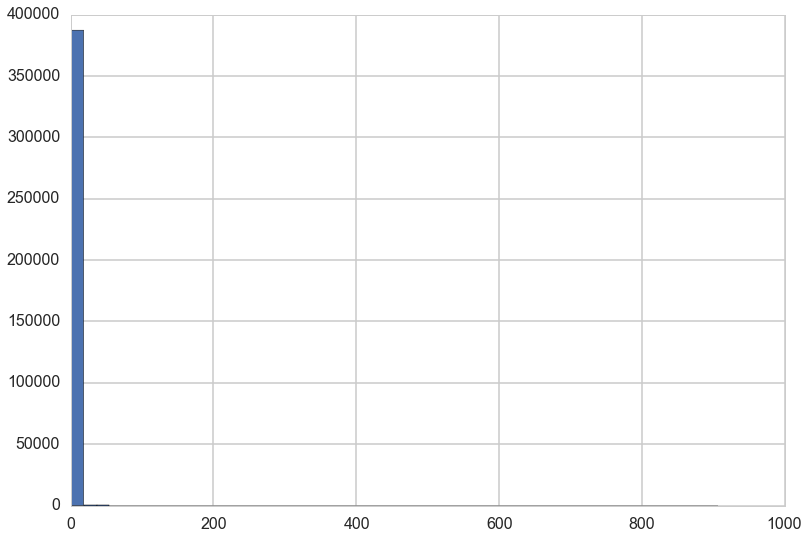

In [188]:
plt.hist(tweets_df['likes'],bins=50)

In [203]:
#count_groupby
len(mean_groupby)

3631

In [210]:
count_groupby = pd.DataFrame(count_groupby)
count_groupby.columns = ['count']

In [302]:
pd.concat([mean_groupby, count_groupby]).head()

count     likes  retweets
company_name Series                              
140Proof     _Series_B    NaN  0.086420  0.055556
1stdibs      _Series_C    NaN  1.863850  1.521127
2C2P         _Series_A    NaN  0.035088  0.070175
             _Series_B    NaN  0.274336  0.292035
             _Series_C    NaN  0.513043  0.286957

In [303]:
count_groupby.head()

count
company_name Series          
140Proof     _Series_B    162
1stdibs      _Series_C    213
2C2P         _Series_A     57
             _Series_B    113
             _Series_C    115

In [304]:
mean_groupby.head()

likes  retweets
company_name Series                       
140Proof     _Series_B  0.086420  0.055556
1stdibs      _Series_C  1.863850  1.521127
2C2P         _Series_A  0.035088  0.070175
             _Series_B  0.274336  0.292035
             _Series_C  0.513043  0.286957

In [312]:
# persontags, hashtags, links
def get_tags(text):
    persontags = []
    hashtags = []
    links = []
    wordlist = text.split()
    for word in wordlist:
        if len(word) >= 2 and word[0] == '@':
            persontags.append(word[1:])
        if len(word) >= 2 and word[0] == '#':
            hashtags.append(word[1:])
        if len(word) >= 5 and word.startswith('http'):
            links.append(word)
    return {'persontags': persontags, 'hashtags': hashtags, 'links': links}
        

In [314]:
tweets_df['persontags'] = tweets_df.text.apply(lambda text: get_tags(text)['persontags'])
tweets_df['hashtags'] = tweets_df.text.apply(lambda text: get_tags(text)['hashtags'])
tweets_df['links'] = tweets_df.text.apply(lambda text: get_tags(text)['links'])
tweets_df['persontags_count'] = tweets_df.text.apply(lambda text: len(get_tags(text)['persontags']))
tweets_df['hashtags_count'] = tweets_df.text.apply(lambda text: len(get_tags(text)['hashtags']))
tweets_df['links_count'] = tweets_df.text.apply(lambda text: len(get_tags(text)['links']))

In [320]:
tweets_df.head()

,Series,company_name,date,likes,retweets,text,tweeter_href,tweeter_name,persontag_count,hashtag_count,text_length,persontags,hashtags,links,persontags_count,hashtags_count,links_count
0,_Series_A,Occipital,2011-07-14,0,0,@rubaums2 mira no frontal até o occipital e f...,/yehyehgluglu,Maria Melo,1,0,72,[rubaums2],[],[],1,0,0
1,_Series_A,Occipital,2011-07-14,0,1,"Cats out of the bag, we're excited! RT @savvys...",/occipital,Occipital,1,0,138,[savvysarahjane],[],[],1,0,0
2,_Series_A,Occipital,2011-07-14,0,0,me duele la cabeza a la altura del occipital -...,/ArturoMisifu,Arturo Quijano,0,0,67,[],[],[],0,0,0
3,_Series_A,Occipital,2011-07-14,0,0,"No matter what happens, I always have the Occi...",/ortidog,Paul White,0,0,82,[],[],[],0,0,0
4,_Series_A,Occipital,2011-07-14,0,0,Headaches are mostly caused by adhesions in th...,/durlancastro,Durlan Castro,0,0,117,[],[],[],0,0,0


In [337]:
[].count(1)

0

In [339]:
# number of times the company is mentioned in the tweet
tweets_df['self_mention'] = tweets_df.apply(lambda row: 
                                            row['persontags'].count(row['company_name'].lower())
                                           +row['hashtags'].count(row['company_name'].lower())
                                           , axis=1)

In [340]:
# indicator whether the company tweets (1) or someone else tweets (0)
tweets_df['self_tweet'] = tweets_df.apply(lambda row: 
                                          row['company_name'].lower() == row['tweeter_href'].lower()[1:]
                                         , axis=1)

In [342]:
tweets_df['self_tweet'].mean()

0.067019466917562817

In [411]:
from datetime import datetime, date, timedelta
def get_dayrange(datelist):
    if len(datelist) <= 1:
        return 999
    datelist = sorted(datelist)
    #return {'range': (datelist[len(datelist)-1]-datelist[0]).days,
            #'iqr': (datelist[3*len(datelist)/4]-datelist[len(datelist)/4]).days}
    return (datelist[len(datelist)-1]-datelist[0]).days

def get_dayiqr(datelist):
    if len(datelist) <= 1:
        return 999
    datelist = sorted(datelist)
    return (datelist[3*len(datelist)/4]-datelist[len(datelist)/4]).days

,company_name,Series,get_dayrange,get_dayiqr
0,140Proof,_Series_B,335,198
1,1stdibs,_Series_C,13,7
2,2C2P,_Series_A,805,143
3,2C2P,_Series_B,296,143
4,2C2P,_Series_C,207,83
5,2tor,_Series_A,271,67
6,2tor,_Series_B,520,55
7,2tor,_Series_C,98,42
8,365DataCenters,_Series_B,114,53
9,365Scores,_Series_B,1,1


In [412]:
tweets_df.groupby(['company_name', 'Series'])['date'].agg([get_dayrange, get_dayiqr])

get_dayrange  get_dayiqr
company_name    Series                             
140Proof        _Series_B           335         198
1stdibs         _Series_C            13           7
2C2P            _Series_A           805         143
                _Series_B           296         143
                _Series_C           207          83
2tor            _Series_A           271          67
                _Series_B           520          55
                _Series_C            98          42
365DataCenters  _Series_B           114          53
365Scores       _Series_B             1           1
36Kr            _Series_C            83          43
3Drobotics      _Series_A            93          48
                _Series_B            19           6
41stParameter   _Series_D          1434         445
42Floors        _Series_A           119          56
                _Series_B            38          24
4Home           _Series_B             5           5
                _Series_C           290         101
500friends      _Series_A           187         105
5MinMedia       _Series_B             1           1
6fusion         _Series_A           519         213
                _Series_B           251         131
6sense          _Series_A            47          24
                _Series_B            22          11
8DWorld         _Series_B           519          54
8Securities     _Series_A           123          54
                _Series_B           769         409
8thBridge       _Series_A            20          20
                _Series_B           420         308
908Devices      _Series_B           274         172
...                                 ...         ...
myDocket        _Series_A           974         974
                _Series_B          1878          27
myhomemove      _Series_C           387          85
nanoMR          _Series_B           520         172
natera          _Series_A           491         215
                _Series_B            69          39
                _Series_C            12           5
neohapsis       _Series_A           911         315
                _Series_B           911         315
                _Series_C           827         433
oDesk           _Series_C           398          71
                _Series_D             0           0
onefinestay     _Series_A           202         127
                _Series_B            83          41
qinec           _Series_B           523         511
scanR           _Series_B            46          46
sliceX          _Series_B           999         999
thredUP         _Series_B            18           7
                _Series_C            22          11
                _Series_D            10           4
uCirrus         _Series_A           999         999
                _Series_B             1           1
                _Series_C          1238         401
uzabase         _Series_C           287         116
vArmourNetworks _Series_A            99          99
                _Series_B            99          99
                _Series_C           454          63
vWise           _Series_C           945         423
                _Series_D           483         196
viagogo         _Series_D           526         181

[3550 rows x 2 columns]

In [343]:
tweets_df.groupby(['company_name', 'Series'])['date'].describe()

company_name     Series           
140Proof         _Series_B  count            162
                            unique            91
                            top       2010-04-14
                            freq              12
1stdibs          _Series_C  count            213
                            unique            14
                            top       2014-12-10
                            freq              45
2C2P             _Series_A  count             57
                            unique            36
                            top       2010-05-31
                            freq               7
                 _Series_B  count            113
                            unique            59
                            top       2014-02-20
                            freq               8
                 _Series_C  count             58
                            unique            37
                            top       2014-07-29
                            freq  

In [327]:
(tweets_df.groupby(['company_name', 'Series'])['date'])

PandasError: DataFrame constructor not properly called!

In [414]:
tweets_df.groupby(['company_name', 'Series']).agg(['mean','std'])

likes             retweets           persontag_count           hashtag_count           text_length            persontags_count           hashtags_count           links_count           self_mention           self_tweet          
                               mean        std      mean       std            mean       std          mean       std        mean        std             mean       std           mean       std        mean       std         mean       std       mean       std
company_name    Series                                                                                                                                                                                                                                           
140Proof        _Series_B  0.086420   0.322934  0.055556  0.255377        0.746914  1.286875      0.444444  0.834058  110.845679  38.398462         0.740741  1.288051       0.444444  0.834058    0.314815  0.504295     0.197531  0.399371   0.012346  0.110766
1stdibs         _Series_C  1.863850   5.780192  1.521127  7.009816        0.957746  1.087276      1.098592  1.882052  130.516432  38.451464         0.934272  1.079570       1.093897  1.876018    0.840376  0.458529     0.436620  0.515763   0.145540  0.353475
2C2P            _Series_A  0.035088   0.264906  0.070175  0.257713        0.385965  0.619746      0.263158  0.551825   96.947368  55.920678         0.385965  0.619746       0.263158  0.551825    0.543860  0.569153     0.000000  0.000000   0.087719  0.285401
                _Series_B  0.274336   0.671456  0.292035  0.740191        0.362832  0.641732      0.513274  0.973901  119.079646  43.130231         0.309735  0.613533       0.504425  0.964771    0.849558  0.447637     0.070796  0.257627   0.026549  0.161476
                _Series_C  0.396552   0.836443  0.275862  0.615390        0.413793  0.649817      0.551724  0.882031  116.034483  46.705860         0.379310  0.644207       0.534483  0.862789    0.775862  0.531238     0.103448  0.307203   0.068966  0.255609
2tor            _Series_A  0.000000   0.000000  0.000000  0.000000        0.941176  1.088037      0.294118  0.587868   84.588235  41.405101         0.941176  1.088037       0.294118  0.587868    0.294118  0.587868     0.352941  0.492592   0.000000  0.000000
                _Series_B  0.125000   1.084828  0.000000  0.000000        0.477941  0.825222      0.183824  0.547076   97.558824  33.323724         0.441176  0.795959       0.183824  0.547076    0.573529  0.539305     0.095588  0.295113   0.000000  0.000000
                _Series_C  0.061728   0.328584  0.197531  0.648357        0.956790  1.287053      0.574074  0.648031  108.623457  34.011510         0.864198  1.268374       0.574074  0.648031    0.697531  0.486967     0.185185  0.389652   0.000000  0.000000
365DataCenters  _Series_B  0.663158   0.858134  0.642105  0.886252        2.052632  1.782709      0.715789  0.930147  122.715789  35.523341         2.031579  1.783211       0.715789  0.930147    0.652632  0.478660     0.631579  0.484935   0.157895  0.366577
365Scores       _Series_B  0.092025   0.348007  0.141104  0.656189        0.582822  0.822642      1.515337  1.113086  181.895706  43.445668         0.552147  0.771029       1.490798  1.090747    0.914110  0.302230     0.184049  0.388718   0.049080  0.216700
36Kr            _Series_C  1.312139  12.936146  0.393064  2.761100        0.364162  0.792618      0.520231  1.009200  149.664740  85.569792         0.289017  0.680070       0.427746  0.896851    0.630058  0.518964     0.023121  0.150725   0.000000  0.000000
3Drobotics      _Series_A  0.223958   0.829337  0.406250  1.176365        0.697917  0.863692      0.458333  1.269181  115.135417  36.970519         0.645833  0.843567       0.437500  1.268321    0.531250  0.530793     0.052083  0.222776   0.156250  0.364041
                _Series_B  1.500000   3.086628  2.000000  3.702579        0.857143  1.051900      0.821429  1.207660  128.964286  38.191843         0.785714  1.

In [318]:
tweets_df.groupby(['company_name', 'Series']).mean()

likes  retweets  persontag_count  hashtag_count  text_length  persontags_count  hashtags_count  links_count
company_name    Series                                                                                                                   
140Proof        _Series_B  0.086420  0.055556         0.746914       0.444444   110.845679          0.740741        0.444444     0.314815
1stdibs         _Series_C  1.863850  1.521127         0.957746       1.098592   130.516432          0.934272        1.093897     0.840376
2C2P            _Series_A  0.035088  0.070175         0.385965       0.263158    96.947368          0.385965        0.263158     0.543860
                _Series_B  0.274336  0.292035         0.362832       0.513274   119.079646          0.309735        0.504425     0.849558
                _Series_C  0.396552  0.275862         0.413793       0.551724   116.034483          0.379310        0.534483     0.775862
2tor            _Series_A  0.000000  0.000000         0.941176       0.294118    84.588235          0.941176        0.294118     0.294118
                _Series_B  0.125000  0.000000         0.477941       0.183824    97.558824          0.441176        0.183824     0.573529
                _Series_C  0.061728  0.197531         0.956790       0.574074   108.623457          0.864198        0.574074     0.697531
365DataCenters  _Series_B  0.663158  0.642105         2.052632       0.715789   122.715789          2.031579        0.715789     0.652632
365Scores       _Series_B  0.092025  0.141104         0.582822       1.515337   181.895706          0.552147        1.490798     0.914110
36Kr            _Series_C  1.312139  0.393064         0.364162       0.520231   149.664740          0.289017        0.427746     0.630058
3Drobotics      _Series_A  0.223958  0.406250         0.697917       0.458333   115.135417          0.645833        0.437500     0.531250
                _Series_B  1.500000  2.000000         0.857143       0.821429   128.964286          0.785714        0.803571     0.750000
41stParameter   _Series_D  0.000000  0.195122         0.853659       0.146341   115.536585          0.829268        0.146341     0.756098
42Floors        _Series_A  0.850467  1.514019         1.542056       0.355140   121.327103          1.439252        0.345794     0.803738
                _Series_B  1.470588  0.926471         1.367647       0.308824   124.279412          1.352941        0.308824     0.838235
4Home           _Series_B  0.000000  0.000000         0.000000       0.000000   135.500000          0.000000        0.000000     0.000000
                _Series_C  0.062500  0.000000         0.500000       0.000000   116.937500          0.500000        0.000000     0.406250
500friends      _Series_A  0.010309  0.175258         0.804124       0.298969   111.907216          0.783505        0.298969     0.515464
5MinMedia       _Series_B  0.000000  0.000000         1.000000       0.000000   129.000000          1.000000        0.000000     0.500000
6fusion         _Series_A  0.010204  0.020408         0.642857       0.367347   100.316327          0.642857        0.357143     0.377551
                _Series_B  0.011299  0.158192         0.593220       0.468927   108.621469          0.564972        0.463277     0.576271
6sense          _Series_A  0.195349  0.241860         0.646512       0.497674   104.497674          0.595349        0.451163     0.181395
                _Series_B  0.646465  0.666667         0.262626       1.242424   135.858586          0.242424        0.848485     0.454545
8DWorld         _Series_B  0.000000  0.000000         0.600000       0.400000   135.400000          0.600000        0.400000     0.400000
8Securities     _Series_A  0.139785  0.629032         1.537634       0.591398   117.693548          1.456989        0.564516     0.569892
                _Series_B  0.446043  1.079137         1.546763       0.956835   120.165468          1.496403        0.942446     0.467626
8thBridge       _Series_A  0

In [317]:
tweets_df.head()

,Series,company_name,date,likes,retweets,text,tweeter_href,tweeter_name,persontag_count,hashtag_count,text_length,persontags,hashtags,links,persontags_count,hashtags_count,links_count
0,_Series_A,Occipital,2011-07-14,0,0,@rubaums2 mira no frontal até o occipital e f...,/yehyehgluglu,Maria Melo,1,0,72,[rubaums2],[],[],1,0,0
1,_Series_A,Occipital,2011-07-14,0,1,"Cats out of the bag, we're excited! RT @savvys...",/occipital,Occipital,1,0,138,[savvysarahjane],[],[],1,0,0
2,_Series_A,Occipital,2011-07-14,0,0,me duele la cabeza a la altura del occipital -...,/ArturoMisifu,Arturo Quijano,0,0,67,[],[],[],0,0,0
3,_Series_A,Occipital,2011-07-14,0,0,"No matter what happens, I always have the Occi...",/ortidog,Paul White,0,0,82,[],[],[],0,0,0
4,_Series_A,Occipital,2011-07-14,0,0,Headaches are mostly caused by adhesions in th...,/durlancastro,Durlan Castro,0,0,117,[],[],[],0,0,0


In [202]:
len(pd.concat([mean_groupby, count_groupby])[0])

7262

In [200]:
pd.concat([mean_groupby, count_groupby])[0].isnull()

company_name     Series   
140Proof         _Series_B     True
1stdibs          _Series_C     True
2C2P             _Series_A     True
                 _Series_B     True
                 _Series_C     True
2tor             _Series_A     True
                 _Series_B     True
                 _Series_C     True
365DataCenters   _Series_B     True
365Scores        _Series_B     True
36Kr             _Series_C     True
3Drobotics       _Series_A     True
                 _Series_B     True
41stParameter    _Series_D     True
42Floors         _Series_A     True
                 _Series_B     True
4Home            _Series_B     True
                 _Series_C     True
500friends       _Series_A     True
5MinMedia        _Series_B     True
6fusion          _Series_A     True
                 _Series_B     True
6sense           _Series_A     True
                 _Series_B     True
8DWorld          _Series_B     True
8Securities      _Series_A     True
                 _Series_B     True
8

company_name     Series   
140Proof         _Series_B    162
1stdibs          _Series_C    213
2C2P             _Series_A     57
                 _Series_B    113
                 _Series_C    115
2tor             _Series_A     17
                 _Series_B    137
                 _Series_C    162
365DataCenters   _Series_B     95
365Scores        _Series_B    163
36Kr             _Series_C    198
3Drobotics       _Series_A    192
                 _Series_B     56
41stParameter    _Series_D     41
42Floors         _Series_A    107
                 _Series_B    136
4Home            _Series_B      2
                 _Series_C     32
500friends       _Series_A     97
5MinMedia        _Series_B      2
6fusion          _Series_A     98
                 _Series_B    177
6sense           _Series_A    215
                 _Series_B    178
8DWorld          _Series_B      5
8Securities      _Series_A    186
                 _Series_B    139
8thBridge        _Series_A      2
                 _Ser

In [180]:
count = tweets_df.groupby(['company_name','Series']).count()['date']

In [154]:
funding_csv = pd.read_csv('startups/funding.csv')

In [155]:
funding_csv.head()

,Description,Market,Names,No_Stage_Amount,No_Stage_Date,Pitch,Seed_Amount,Seed_Date,Series_A_Amount,Series_A_Date,Series_B_Amount,Series_B_Date,Series_C_Amount,Series_C_Date,Series_D_Amount,Series_D_Date,Stage
0,NaN,Cable,Epic-Sciences,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$13,000,000","Nov 13, 2012","$30,000,000","Jul 30, 2014",NaN,NaN,Series C
1,NaN,All Students,Apreso-Classroom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$15,000,000","Oct 14, 2008",NaN,NaN,NaN,NaN,Series B
2,Visualead (视觉码) creates better interactions be...,Bridging Online and Offline,Visualead,NaN,NaN,Effective and Secure Offline to Mobile experie...,"$750,000","Mar 25, 2012","$1,600,000","Aug 15, 2013",Unknown,"Jan 20, 2015",NaN,NaN,NaN,NaN,Series B
3,NaN,Food Processing,Onshift,"$7,000,000","Feb 3, 2014",NaN,NaN,NaN,NaN,NaN,"$3,000,000","Feb 2, 2012",NaN,NaN,NaN,NaN,Series C
4,NaN,-,Xendex-Holding,NaN,NaN,NaN,NaN,NaN,Unknown,"Jun 25, 2008","$3,500,000","Nov 30, 2009",NaN,NaN,NaN,NaN,Series A


In [472]:
dict(Counter(funding_csv['Market'])).sort(key=dict.get)

AttributeError: 'dict' object has no attribute 'sort'

In [491]:
markets_dict = dict(Counter(funding_csv['Market']))

In [497]:
markets = sorted(markets_dict.items(), key=lambda x: x[1], reverse=True)

In [499]:
# remove nan and '-'
markets.pop(3)
markets.pop(0)

(nan, 306)

In [500]:
markets

[('Biotechnology', 284),
 ('Software', 235),
 ('Health Care', 104),
 ('Enterprise Software', 97),
 ('Clean Technology', 80),
 ('Hardware + Software', 76),
 ('Semiconductors', 74),
 ('Curated Web', 58),
 ('Mobile', 58),
 ('Web Hosting', 47),
 ('Security', 45),
 ('Advertising', 42),
 ('E-Commerce', 41),
 ('Games', 36),
 ('Finance', 34),
 ('Analytics', 32),
 ('SaaS', 26),
 ('Manufacturing', 26),
 ('Health and Wellness', 22),
 ('Technology', 20),
 ('Big Data Analytics', 20),
 ('Education', 19),
 ('Consulting', 16),
 ('Hospitality', 15),
 ('Messaging', 15),
 ('Marketplaces', 13),
 ('Social Media', 13),
 ('Networking', 13),
 ('Virtualization', 13),
 ('B2B', 12),
 ('Web Development', 12),
 ('Crowdsourcing', 11),
 ('Cloud Data Services', 11),
 ('Video', 11),
 ('Medical Devices', 11),
 ('Big Data', 11),
 ('Fashion', 10),
 ('Real Estate', 10),
 ('Databases', 10),
 ('Online Video Advertising', 9),
 ('Wireless', 9),
 ('Mobile Advertising', 9),
 ('Public Relations', 9),
 ('Apps', 9),
 ('Small and M

In [166]:
Counter(funding_csv['Market'])

Counter({nan: 306, 'Biotechnology': 284, 'Software': 235, '-': 191, 'Health Care': 104, 'Enterprise Software': 97, 'Clean Technology': 80, 'Hardware + Software': 76, 'Semiconductors': 74, 'Mobile': 58, 'Curated Web': 58, 'Web Hosting': 47, 'Security': 45, 'Advertising': 42, 'E-Commerce': 41, 'Games': 36, 'Finance': 34, 'Analytics': 32, 'SaaS': 26, 'Manufacturing': 26, 'Health and Wellness': 22, 'Technology': 20, 'Big Data Analytics': 20, 'Education': 19, 'Consulting': 16, 'Messaging': 15, 'Hospitality': 15, 'Marketplaces': 13, 'Networking': 13, 'Social Media': 13, 'Virtualization': 13, 'B2B': 12, 'Web Development': 12, 'Crowdsourcing': 11, 'Cloud Data Services': 11, 'Video': 11, 'Big Data': 11, 'Medical Devices': 11, 'Real Estate': 10, 'Databases': 10, 'Fashion': 10, 'Online Video Advertising': 9, 'Public Relations': 9, 'Apps': 9, 'Mobile Advertising': 9, 'Wireless': 9, 'Mobile Payments': 8, 'Advertising Platforms': 8, 'Open Source': 8, 'Small and Medium Businesses': 8, 'Android': 8, '

(array([ 398.,   29.,    4.,    3.,    2.,    3.,    2.,    2.,    0.,
           2.,    0.,    1.,    2.,    0.,    0.,    1.,    1.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,
           0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    1.,    0.,    0.,    1.]),
 array([   1. ,    7.1,   13.2,   19.3,   25.4,   31.5,   37.6,   43.7,
          49.8,   55.9,   62. ,   68.1,   74.2,   80.3,   86.4,   92.5,
          98.6,  104.7,  110.8,  116.9,  123. ,  129.1,  135.2,  141.3,
         147.4,  153.5,  159.6,  165.7,  171.8,  177.9,  184. ,  190.1,
         196.2,  202.3,  208.4,  214.5,  220.6,  226.7,  232.8,  238.9,
         245. ,  251.1,  257.2,  263.3,  269.4,  275.5,  281.6,  287.7,
         293.8,  299.9,  306. ]),
 <a list of 50 Patch objects>)

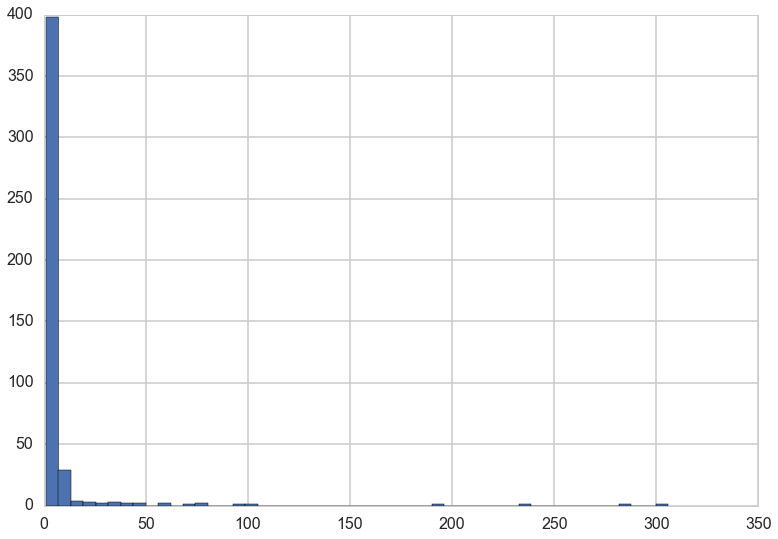

In [165]:
plt.hist(Counter(funding_csv['Market']).values(),bins=50)

In [416]:
kevin_features = pd.read_csv('startups/regress_features.csv')

In [474]:
kevin_features.drop('Unnamed: 0',axis=1,inplace=True)

In [475]:
kevin_features.head()

,Avg_Tweets,company_name,Series,Total_Likes,Total_Retweets,Series_Amount,Market
0,16.384615,1stdibs,_Series_C,230,134,15000000,Semiconductors
1,1.603960,2tor,_Series_C,10,32,32500000,NaN
2,163.000000,365Scores,_Series_B,15,23,5500000,Apps
3,2.109756,36Kr,_Series_C,58,21,20000,Startups
4,0.696850,6fusion,_Series_B,2,28,7000000,Hardware + Software


In [429]:
kevin_features.rename(columns={'Company':'company_name'}, inplace=True)
kevin_features['Series'] = kevin_features['Series'].apply(lambda series: '_'+series)

In [440]:
mean_df = tweets_df.groupby(['company_name', 'Series']).mean().reset_index()
std_df = tweets_df.groupby(['company_name', 'Series']).std().reset_index()

In [442]:
mean_df.columns = ['company_name', 'Series'] + [name + '_mean' for name in mean_df.columns if name not in ['company_name', 'Series']]
std_df.columns = ['company_name', 'Series'] + [name + '_std' for name in std_df.columns if name not in ['company_name', 'Series']]

In [469]:
days_df = tweets_df.groupby(['company_name', 'Series'])['date'].agg([get_dayrange, get_dayiqr]).reset_index()
days_df.rename(columns={'get_dayrange':'dayrange','get_dayiqr':'dayiqr'})
days_df.head(3)

,company_name,Series,get_dayrange,get_dayiqr
0,140Proof,_Series_B,335,198
1,1stdibs,_Series_C,13,7
2,2C2P,_Series_A,805,143


In [470]:
count_df = tweets_df.groupby(['company_name', 'Series'])['date'].count().reset_index()
count_df.rename(columns={'date':'tweet_count'}, inplace=True)
count_df.head(3)

,company_name,Series,tweet_count
0,140Proof,_Series_B,162
1,1stdibs,_Series_C,213
2,2C2P,_Series_A,57


In [446]:
kevin_features.shape

(1210, 8)

In [505]:
KEYS = ['company_name','Series']
result = pd.merge(kevin_features, count_df, on=KEYS)
result = pd.merge(result, days_df, on=KEYS)
result = pd.merge(result, mean_df, on=KEYS)
result = pd.merge(result, std_df, on=KEYS)

In [447]:
kevin_mean = pd.merge(kevin_features, mean_df, on=['company_name','Series'])

In [453]:
kevin_mean_std = pd.merge(kevin_mean, std_df, on=['company_name','Series'])

In [510]:
result.shape

(1210, 40)

[('Biotechnology', 284),
 ('Software', 235),
 ('Health Care', 104),
 ('Enterprise Software', 97),
 ('Clean Technology', 80),
 ('Hardware + Software', 76),
 ('Semiconductors', 74),
 ('Curated Web', 58),
 ('Mobile', 58),
 ('Web Hosting', 47)]

In [509]:
top10markets = markets[:10]
for market, num in top10markets:
    result['is_' + market] = (result['Market'] == market)
    

In [514]:
for round in ['A','B','C','D']:
    result['is_Series_' + round] = (result['Series'] == ('_Series_' + round))

In [513]:
result.to_csv('features_no_sentiment.csv')